In [1]:
import pandas as pd
import numpy as np

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

In [4]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import r2_score

In [5]:
data=pd.read_csv(r"C:\Users\bhanu\Downloads\NIT\03 JUNE\12th\12th\lasso, ridge, elastic net\TASK-22_LASSO,RIDGE\car-mpg.csv")

In [6]:
data.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,0,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,0,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,0,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,0,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,0,ford torino


In [7]:
data=data.drop(['car_name'],axis=1)
data['origin']=data['origin'].replace({1:'america',2:'europe',3:'asia'})
data=pd.get_dummies(data,columns=['origin'])
data=data.replace('?',np.nan)
data=data.apply(lambda x: x.fillna(x.median()),axis=0)

In [8]:
data.head()

,mpg,cyl,disp,hp,wt,acc,yr,car_type,origin_america,origin_asia,origin_europe
0,18.0,8,307.0,130,3504,12.0,70,0,1,0,0
1,15.0,8,350.0,165,3693,11.5,70,0,1,0,0
2,18.0,8,318.0,150,3436,11.0,70,0,1,0,0
3,16.0,8,304.0,150,3433,12.0,70,0,1,0,0
4,17.0,8,302.0,140,3449,10.5,70,0,1,0,0


In [9]:
x=data.drop(['mpg'],axis=1)
y=data[['mpg']]

In [11]:
x_s=preprocessing.scale(x)
x_s=pd.DataFrame(x_s,columns=x.columns)
y_s=preprocessing.scale(y)
y_s=pd.DataFrame(y_s,columns=y.columns)

In [14]:
x_train,x_test,y_train,y_test=train_test_split(x_s,y_s,test_size=0.30,random_state=1)
x_train.shape

(278, 10)

In [17]:
regression_model=LinearRegression()
regression_model.fit(x_train,y_train)
for idx,col_name in enumerate(x_train.columns):
    print('The coefficient for{} is {}'.format(col_name,regression_model.coef_[0][idx]))
intercept=regression_model.intercept_[0] 
print('The intercept is {}'.format(intercept))

The coefficient forcyl is 0.3210223856916118
The coefficient fordisp is 0.32483430918483785
The coefficient forhp is -0.22916950059437652
The coefficient forwt is -0.7112101905072294
The coefficient foracc is 0.014713682764190723
The coefficient foryr is 0.37558119495107467
The coefficient forcar_type is 0.3814769484233105
The coefficient fororigin_america is -0.07472247547584158
The coefficient fororigin_asia is 0.04451525203567841
The coefficient fororigin_europe is 0.04834854953945409
The intercept is 0.019284116103639767


# REGULARIZED RIDGE REGRESSION

In [19]:
ridge_model=Ridge(alpha=0.3)
ridge_model.fit(x_train,y_train)
print('Ridge model coef:{}'.format(ridge_model.coef_))

Ridge model coef:[[ 0.31649043  0.31320707 -0.22876025 -0.70109447  0.01295851  0.37447352
   0.37725608 -0.07423624  0.04441039  0.04784031]]


# rREGULARIZED LASSO REGRESSION

In [21]:
lasso_model=Lasso(alpha=0.1)
lasso_model.fit(x_train,y_train)
print('Lasso model coef:{}'.format(lasso_model.coef_))

Lasso model coef:[-0.         -0.         -0.01690287 -0.51890013  0.          0.28138241
  0.1278489  -0.01642647  0.          0.        ]


# score comparision

In [22]:
print(regression_model.score(x_train,y_train))
print(regression_model.score(x_test,y_test))

0.8343770256960538
0.8513421387780066


In [23]:
print(ridge_model.score(x_train,y_train))
print(ridge_model.score(x_test,y_test))
print()

0.8343617931312617
0.8518882171608505



In [24]:
print(lasso_model.score(x_train,y_train))
print(lasso_model.score(x_test,y_test))
print()

0.7938010766228453
0.8375229615977084



# model parameter tuning

In [26]:
data_train_test=pd.concat([x_train,y_train],axis=1)
data_train_test.head()

,cyl,disp,hp,wt,acc,yr,car_type,origin_america,origin_asia,origin_europe,mpg
350,-0.856321,-0.849116,-1.081977,-0.893172,-0.242570,1.351199,0.941412,0.773559,-0.497643,-0.461968,1.432898
59,-0.856321,-0.925936,-1.317736,-0.847061,2.879909,-1.085858,0.941412,-1.292726,-0.497643,2.164651,-0.065919
120,-0.856321,-0.695475,0.201600,-0.121101,-0.024722,-0.815074,0.941412,-1.292726,-0.497643,2.164651,-0.578335
12,1.498191,1.983643,1.197027,0.934732,-2.203196,-1.627426,-1.062235,0.773559,-0.497643,-0.461968,-1.090751
349,-0.856321,-0.983552,-0.951000,-1.165111,0.156817,1.351199,0.941412,-1.292726,2.009471,-0.461968,1.356035


In [36]:
import statsmodels.formula.api as smf
ols1 = smf.ols(formula ='mpg ~cyl+disp+hp+wt+acc+yr+car_type+origin_america+origin_asia+origin_europe'
               ,data=data_train_test).fit()
ols1.params

Intercept         0.019284
cyl               0.321022
disp              0.324834
hp               -0.229170
wt               -0.711210
acc               0.014714
yr                0.375581
car_type          0.381477
origin_america   -0.074722
origin_asia       0.044515
origin_europe     0.048349
dtype: float64

In [37]:
print(ols1.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     150.0
Date:                Wed, 14 Jun 2023   Prob (F-statistic):           3.12e-99
Time:                        15:53:34   Log-Likelihood:                -146.89
No. Observations:                 278   AIC:                             313.8
Df Residuals:                     268   BIC:                             350.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.0193      0.025      0.

In [38]:
mse=np.mean((regression_model.predict(x_test)-y_test)**2)

C:\Users\bhanu\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [39]:
import math
rmse=math.sqrt(mse)
print('Root Mean Squared Error:{}'.format(rmse))

Root Mean Squared Error:0.3776693425408784


<Axes: xlabel='acc', ylabel='mpg'>

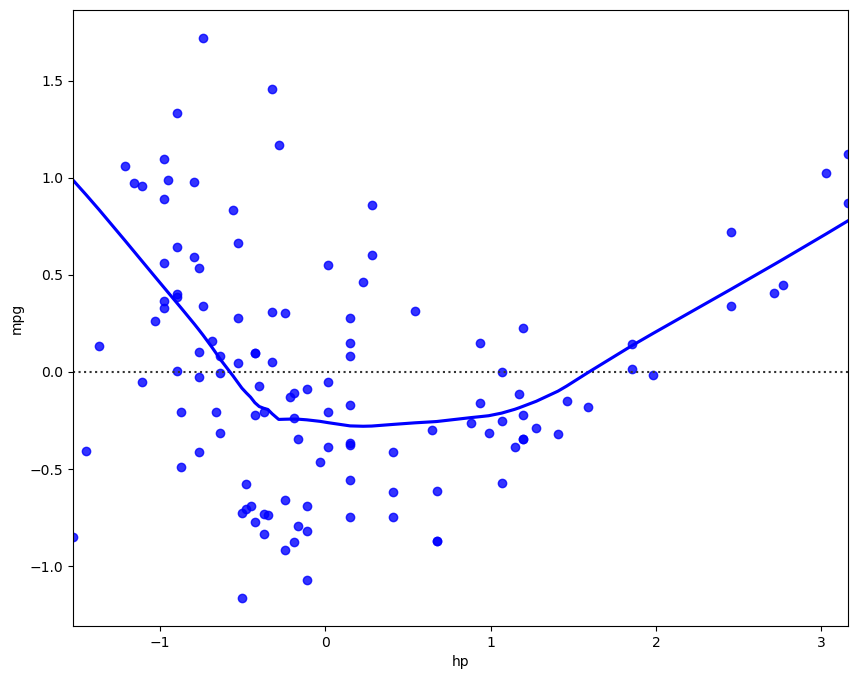

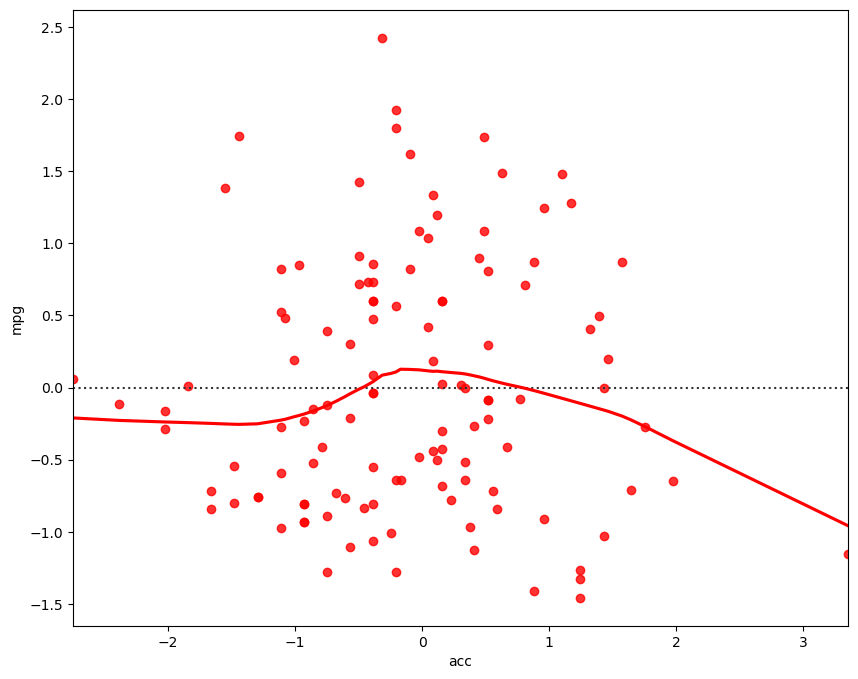

In [43]:
fig=plt.figure(figsize=(10,8))
sns.residplot(x=x_test['hp'],y=y_test['mpg'],color='blue',lowess=True)
              
fig=plt.figure(figsize=(10,8))
sns.residplot(x=x_test['acc'],y=y_test['mpg'],color='red',lowess=True)

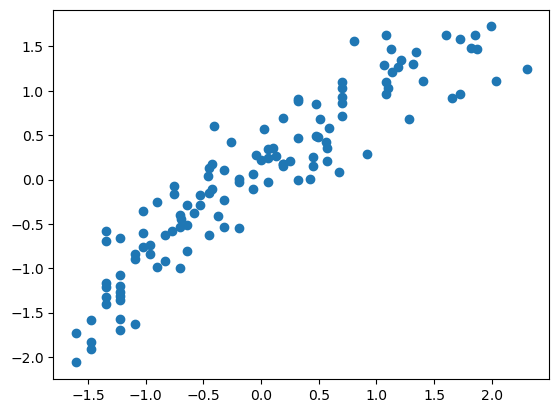

In [44]:
y_pred=regression_model.predict(x_test)
plt.scatter(y_test['mpg'],y_pred)
